In [1]:
from astropy.table import Table, Column, table, vstack, setdiff
from pathlib import Path

import numpy as np

from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
path_raw='../Datos/Raw/'
path_phot_ned = '../Datos/Work/Phot_Tables_NED/' #In this path wi will save the photometry tables for each object
path_phot_cds = '../Datos/Work/Phot_Tables_CDS/'
path_SED = '../Datos/Work/SEDs/'
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

out = ['/out_0a90/','/out_30y70/']

## Joinig the results from CIGALE of each group 

Read and join all the results of CIGALE of each group:
- **out_0a90:** Are the results for the setup **pcigale.ini** with skirtor2016 parameters of i = 0 to 90 in steps of 10 and oa = 40
- **out_30y70:** Are the results for the setup **pcigale.ini** with skirtor2016 parameters of i = 30 and 70 in steps and oa = 10, 40 and 70

Number of galaxys in group 1 :  117
Number of galaxys in group 2 :  59
Number of galaxys in group 3 :  25
Number of galaxys in group 4 :  8
Number of galaxys in group 5 :  9
Number of galaxys in group 6 :  17
Number of galaxys in group 7 :  6
Number of galaxys in group 8 :  4
Number of galaxys in group 9 :  3
Number of galaxys in group 10 :  4
Total galaxys:  252
Total galaxys:  252


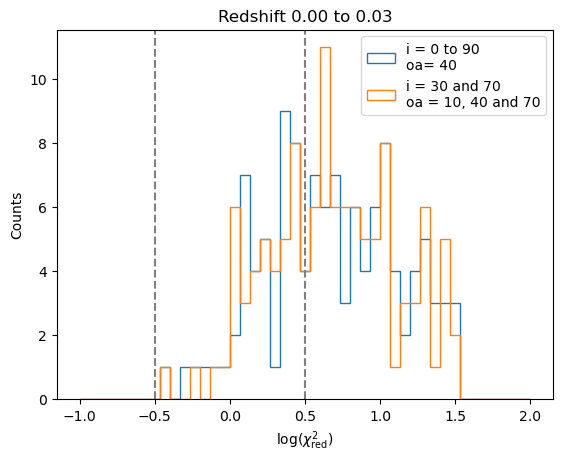

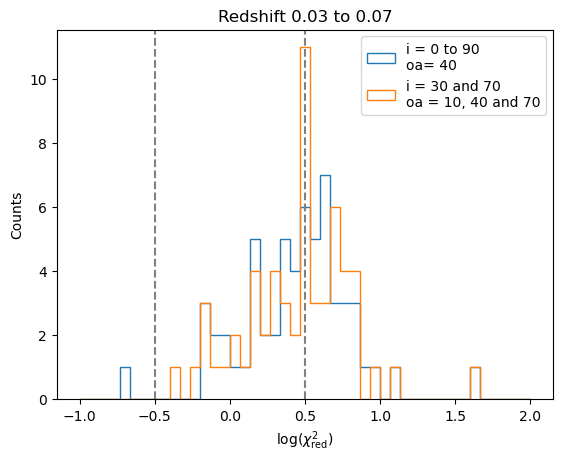

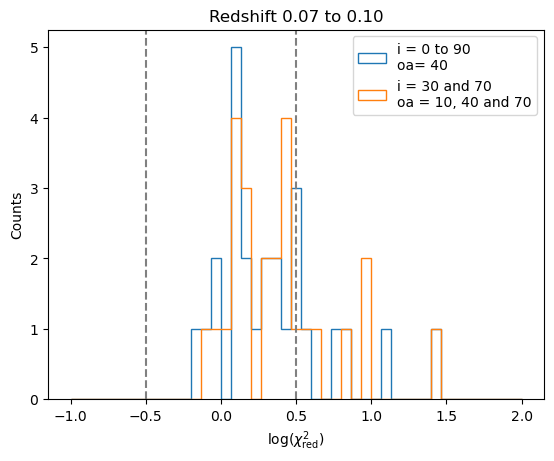

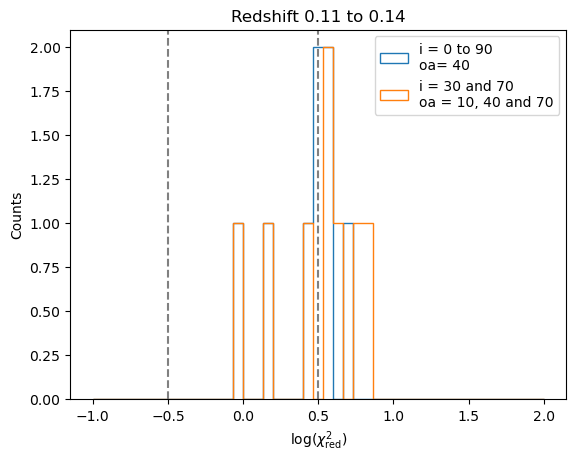

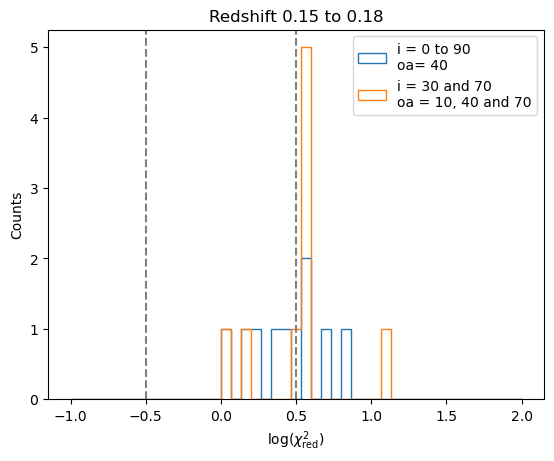

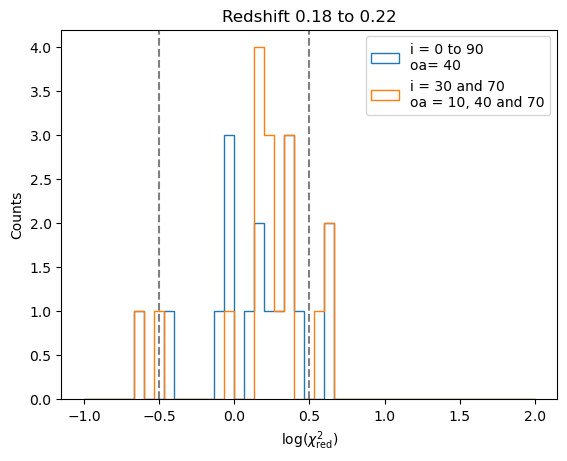

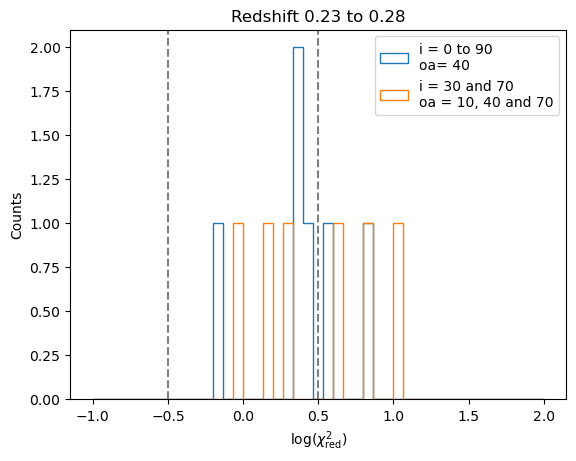

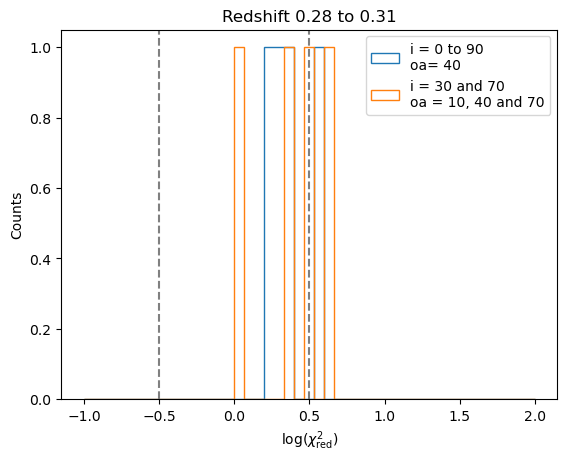

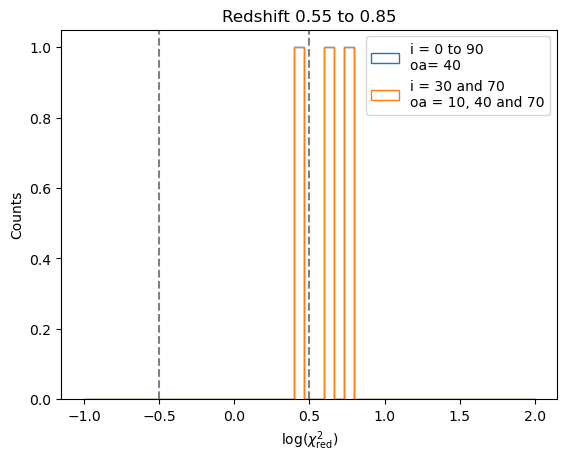

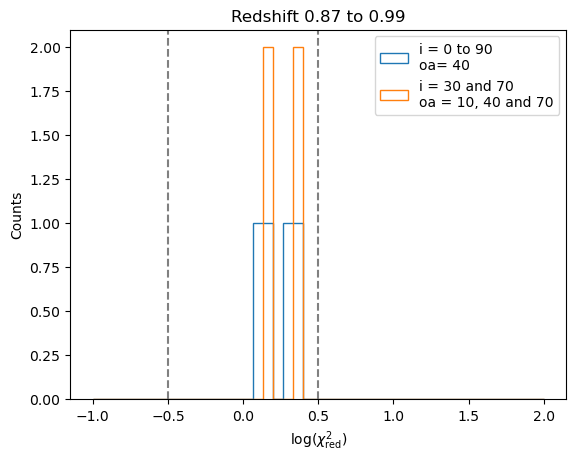

In [3]:
out0to90 = Table()
out30and70 = Table()
out_1 = Table()
out_2 = Table()
redshift_ranges = ['0.00 to 0.03','0.03 to 0.07','0.07 to 0.10','0.11 to 0.14','0.15 to 0.18',\
                   '0.18 to 0.22','0.23 to 0.28','0.28 to 0.31','0.55 to 0.85','0.87 to 0.99']

for i in range(10):
    CIGPhotIn = Table()
    out0090 = Table()
    out3070 = Table()
    CIGPhotIn = Table.read(path_CIGALE_phot+'CIGPhot_EnergyBal_'+str(i+1)+'.tbl', format='ascii')
    out0090 = Table.read(path_CIGALE_out+'Group_'+str(i+1)+out[0]+'results.fits',format='fits')
    out3070 = Table.read(path_CIGALE_out+'Group_'+str(i+1)+out[1]+'results.fits',format='fits')
    
    out0090['log.reduced_chi_square'] = np.log10(out0090['best.reduced_chi_square'])
    out3070['log.reduced_chi_square'] = np.log10(out3070['best.reduced_chi_square'])
    
    binsChiS = np.linspace(-1.0, 2.0, 46)  # Assuming ChiSquare bins in this ranges
    fig, axs = plt.subplots(1)
    h1 = plt.hist(out0090['log.reduced_chi_square'], bins=binsChiS, histtype='step',\
                  label='i = 0 to 90\noa= 40')
    h2 = plt.hist(out3070['log.reduced_chi_square'], bins=binsChiS, histtype='step',\
                  label='i = 30 and 70\noa = 10, 40 and 70')
    plt.axvline(x=-0.5,ls='--',color='gray')
    plt.axvline(x=0.5,ls='--',color='gray')
    plt.title('Redshift '+redshift_ranges[i])
    plt.xlabel(r'$\log(\chi^2_{\rm{red}})$')
    plt.ylabel('Counts')
    plt.legend()
    plt.savefig(path_graphs+'histo_CIGALE_fitting_group'+str(i+1)+'.jpg')
    
    print('Number of galaxys in group',i+1,': ',len(out0090))
    
    out0to90 = vstack([out0090, out0to90]) #Join all the result tables from CIGALE
    out30and70 = vstack([out3070, out30and70]) #Join all the result tables from CIGALE
    
    out_1 = vstack([out0090, out_1]) #Join all the result tables from CIGALE
    out_2 = vstack([out3070, out_2]) #Join all the result tables from CIGALE

print('Total galaxys: ',len(out0to90))
print('Total galaxys: ',len(out_1))

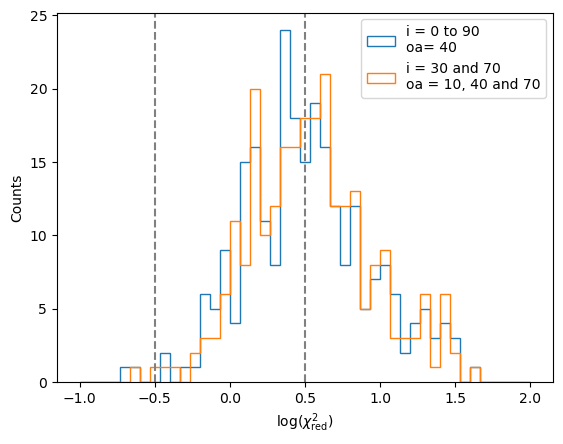

In [24]:
binsChiS = np.linspace(-1.0, 2.0, 46)  # Assuming ChiSquare bins in this ranges
plt.hist(out0to90['log.reduced_chi_square'], bins=binsChiS, histtype='step',\
         label='i = 0 to 90\noa= 40')
plt.hist(out30and70['log.reduced_chi_square'], bins=binsChiS, histtype='step',\
         label='i = 30 and 70\noa = 10, 40 and 70')
plt.axvline(x=-0.5,ls='--',color='gray')
plt.axvline(x=0.5,ls='--',color='gray')
plt.xlabel(r'$\log(\chi^2_{\rm{red}})$')
plt.ylabel('Counts')
plt.legend()
plt.savefig(path_graphs+'histo_CIGALE_fitting.jpg')

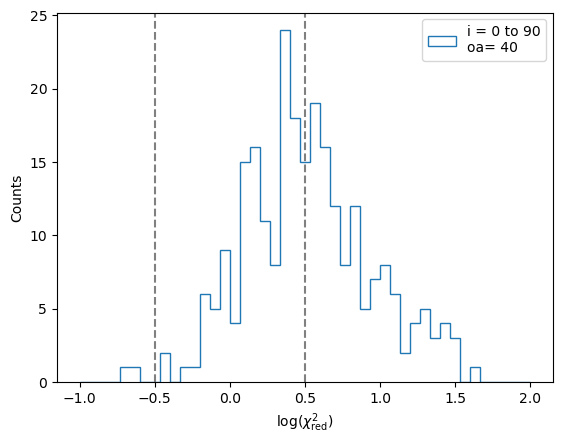

In [23]:
plt.hist(out0to90['log.reduced_chi_square'], bins=binsChiS, histtype='step',\
         label='i = 0 to 90\noa= 40')
plt.axvline(x=-0.5,ls='--',color='gray')
plt.axvline(x=0.5,ls='--',color='gray')
plt.xlabel(r'$\log(\chi^2_{\rm{red}})$')
plt.ylabel('Counts')
plt.legend()
plt.savefig(path_graphs+'histo_CIGALE_fitting_0a90.jpg')

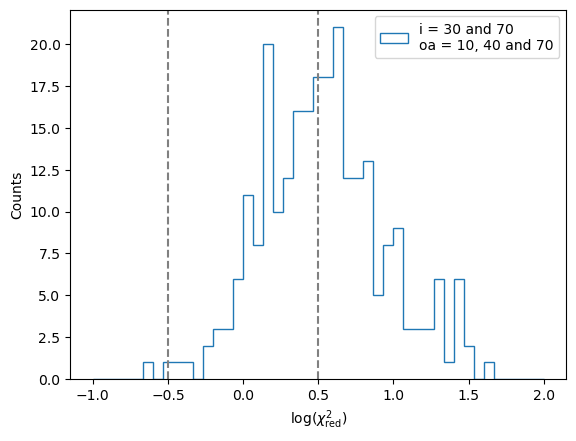

In [25]:
plt.hist(out30and70['log.reduced_chi_square'], bins=binsChiS, histtype='step',\
         label='i = 30 and 70\noa = 10, 40 and 70')
plt.axvline(x=-0.5,ls='--',color='gray')
plt.axvline(x=0.5,ls='--',color='gray')
plt.xlabel(r'$\log(\chi^2_{\rm{red}})$')
plt.ylabel('Counts')
plt.legend()
plt.savefig(path_graphs+'histo_CIGALE_fitting_30y70.jpg')

Re-order the two tables by id according the general table from the input data of CIGALE (Notebook 4):

In [5]:
Phot = Table.read(path_FINAL+'CIGPhot_EnergyBal_All.tbl', format='ascii')
Nbands = [sum(~np.isnan(list(row)[2::2])) for row in Phot]
out0to90 = out0to90[np.concatenate([np.where(out0to90['id'] == oid)[0] for oid in Phot['id']])]
out30and70 = out30and70[np.concatenate([np.where(out30and70['id'] == oid)[0] for oid in Phot['id']])]

In [7]:
diff_models = out0to90['best.reduced_chi_square'] - out30and70['best.reduced_chi_square']
print(r'Average difference between reduced chi-square:', 
      np.round(np.mean(np.abs(diff_models)), 3))

Average difference between reduced chi-square: 0.536


In [6]:
out = vstack([out0to90, out30and70])
out = out[np.concatenate([np.where(out['id'] == oid)[0] for oid in Phot['id']])]
#out['id','best.reduced_chi_square','log.reduced_chi_square','bayes.agn.i'].show_in_notebook()

## Joinig the two configurations results from pcigale.ini

### Selecting the model with the $\chi_{\rm{red}}^{2}$ nearer to 1.0

Selecting models between the two configurations of pcinale.ini used in CIGALE based in the model with the better fit with the criteria that a $\chi_{\rm{red}}^{2} = 1.0$ means the best fit

In [8]:
out_1 = out_1[np.concatenate([np.where(out_1['id'] == oid)[0] for oid in Phot['id']])]
out_2 = out_2[np.concatenate([np.where(out_2['id'] == oid)[0] for oid in Phot['id']])]

to_rem_o1 = [] #Rows to be deleted or removed in out_1
to_rem_o2 = [] #Rows to be deleted or removed in out_2

for i in range(len(Phot)):
    a = abs(out_1['log.reduced_chi_square'][i])-0
    b = abs(out_2['log.reduced_chi_square'][i])-0
    #print('a =',a,'b =',b)
    if a < b:
        to_rem_o2.append(i)
    elif b < a:
        to_rem_o1.append(i)
    elif a == b:
        to_rem_o2.append(i)
#print(to_rem_o1)
#print(to_rem_o2)

out_1.remove_rows(to_rem_o1)
out_2.remove_rows(to_rem_o2)

print(len(out_1))
print(len(out_2))

out_bestChi = vstack([out_1, out_2])
out_bestChi = out_bestChi[np.concatenate([np.where(out_bestChi['id'] == oid)[0] for oid in Phot['id']])]
#out_bestChi['id','log.reduced_chi_square'].show_in_notebook()

144
108


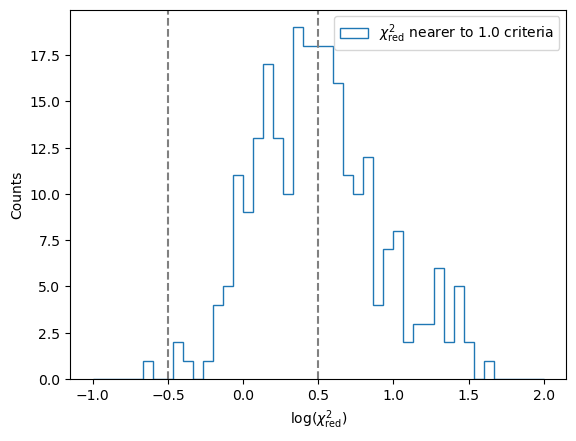

In [9]:
binsChiS = np.linspace(-1.0, 2.0, 46)  # Assuming ChiSquare bins in this ranges
plt.hist(out_bestChi['log.reduced_chi_square'], bins=binsChiS, histtype='step',\
         label=r'$\chi^2_{\rm{red}}$ nearer to 1.0 criteria')
plt.axvline(x=-0.5,ls='--',color='gray')
plt.axvline(x=0.5,ls='--',color='gray')
plt.xlabel(r'$\log(\chi^2_{\rm{red}})$')
plt.ylabel('Counts')
plt.legend()

### Selecting models by the $\Delta \text{BIC}$ criteria

In [10]:
out0to90['DBIC'] = out0to90['best.chi_square'] - out30and70['best.chi_square'] + np.log(Nbands)
out30and70['DBIC'] = out30and70['best.chi_square'] - out0to90['best.chi_square'] + np.log(Nbands)
out0_90_clean = out0to90[np.logical_and.reduce([out0to90['DBIC'] < 2])]
out30_70_clean = out30and70[np.logical_and.reduce([out30and70['DBIC'] < 2])]

print(len(out0_90_clean))
print(len(out30_70_clean))

out_DBIC = vstack([out0_90_clean, out30_70_clean])
out_DBIC = out_DBIC[np.concatenate([np.where(out_DBIC['id'] == oid)[0] for oid in Phot['id']])]
#out_DBIC['id','log.reduced_chi_square'].show_in_notebook()

113
85


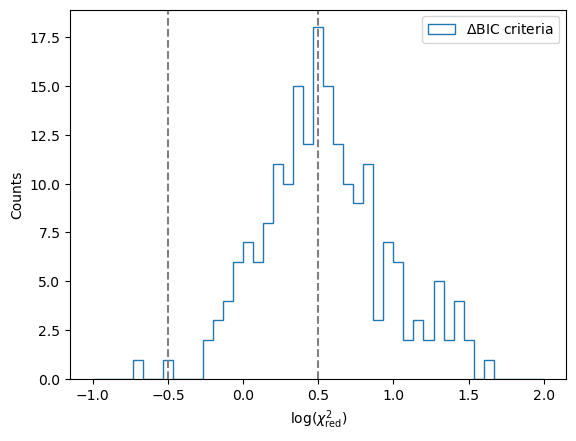

In [11]:
binsChiS = np.linspace(-1.0, 2.0, 46)  # Assuming ChiSquare bins in this ranges
plt.hist(out_DBIC['log.reduced_chi_square'], bins=binsChiS, histtype='step',\
         label=r'$\Delta{\rm{BIC}}$ criteria')
plt.axvline(x=-0.5,ls='--',color='gray')
plt.axvline(x=0.5,ls='--',color='gray')
plt.xlabel(r'$\log(\chi^2_{\rm{red}})$')
plt.ylabel('Counts')
plt.legend()

## Cleaning the results from CIGALE

Now we are goint to remove the galaxies with bad fittings: $\chi_{\rm{red}}^{2}$ higher than $10^{0.5}$ (Underestimated) and lower than $10^{-0.5}$ (Overestimated).

In [12]:
GoodSFR_out0to90 = (out0to90['bayes.sfh.sfr_err'] / (out0to90['bayes.sfh.sfr']*np.log(10))) <= 1
GoodSFR_out30and70 = (out30and70['bayes.sfh.sfr_err'] / (out30and70['bayes.sfh.sfr']*np.log(10))) <= 1
GoodSFR_out_bestChi = (out_bestChi['bayes.sfh.sfr_err'] / (out_bestChi['bayes.sfh.sfr']*np.log(10))) <= 1
GoodSFR_out_DBIC = (out_DBIC['bayes.sfh.sfr_err'] / (out_DBIC['bayes.sfh.sfr']*np.log(10))) <= 1


out0to90_clean = out0to90[np.logical_and.reduce([out0to90['best.reduced_chi_square'] <= 10**0.5, \
                                            out0to90['best.reduced_chi_square'] >= 10**-0.5,GoodSFR_out0to90])]

out30and70_clean = out30and70[np.logical_and.reduce([out30and70['best.reduced_chi_square'] <= 10**0.5, \
                                            out30and70['best.reduced_chi_square'] >= 10**-0.5,GoodSFR_out30and70])]

out_bestChi_clean = out_bestChi[np.logical_and.reduce([out_bestChi['best.reduced_chi_square'] <= 10**0.5, \
                                            out_bestChi['best.reduced_chi_square'] >= 10**-0.5,GoodSFR_out_bestChi])]

out_DBIC_clean = out_DBIC[np.logical_and.reduce([out_DBIC['best.reduced_chi_square'] <= 10**0.5, \
                                            out_DBIC['best.reduced_chi_square'] >= 10**-0.5,GoodSFR_out_DBIC])]

Number of galaxies removed after the cleaining

In [13]:
removed_galaxies_1 = len(out0to90)-len(out0to90_clean)
removed_galaxies_2 = len(out30and70)-len(out30and70_clean)
removed_galaxies_3 = len(out_bestChi)-len(out_bestChi_clean)
removed_galaxies_4 = len(out_DBIC)-len(out_DBIC_clean)
print('The number of galaxies removed in out0to90 are:',removed_galaxies_1)
print('The number of galaxies removed in out30and70:',removed_galaxies_2)
print('The number of galaxies removed in output:',removed_galaxies_3)
print('The number of galaxies removed in out_DBIC:',removed_galaxies_4)

The number of galaxies removed in out0to90 are: 134
The number of galaxies removed in out30and70: 149
The number of galaxies removed in output: 133
The number of galaxies removed in out_DBIC: 115


In [14]:
out0to90_clean = out0to90_clean[np.concatenate([np.where(out0to90_clean['id'] == oid)[0] for oid in Phot['id']])]
out30and70_clean = out30and70_clean[np.concatenate([np.where(out30and70_clean['id'] == oid)[0] for oid in Phot['id']])]
out_bestChi_clean = out_bestChi_clean[np.concatenate([np.where(out_bestChi_clean['id'] == oid)[0] for oid in Phot['id']])]
out_DBIC_clean = out_DBIC_clean[np.concatenate([np.where(out_DBIC_clean['id'] == oid)[0] for oid in Phot['id']])]

out0to90_clean.write(path_CIGALE_out+'results0a90_All.fits', format='fits',overwrite=True)
out0to90_clean.write(path_CIGALE_out+'results0a90_All.txt', format='ascii',overwrite=True)

out30and70_clean.write(path_CIGALE_out+'results30y70_All.fits', format='fits',overwrite=True)
out30and70_clean.write(path_CIGALE_out+'results30y70_All.txt', format='ascii',overwrite=True)

out_bestChi_clean.write(path_CIGALE_out+'results_bestChi.fits', format='fits',overwrite=True)
out_bestChi_clean.write(path_CIGALE_out+'results_bestChi.txt', format='ascii',overwrite=True)

out_DBIC_clean.write(path_CIGALE_out+'resultsDBIC_All.fits', format='fits',overwrite=True)
out_DBIC_clean.write(path_CIGALE_out+'resultsDBIC_All.txt', format='ascii',overwrite=True)

## Notebook Info

In [15]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 7.31.1

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-56-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

numpy     : 1.21.5
astropy   : 5.1
matplotlib: 3.5.2

Watermark: 2.3.1



### Celdas para pruebas:

In [16]:
out0to90_clean['id','bayes.agn.fracAGN','bayes.agn.fracAGN_err','bayes.sfh.sfr','bayes.sfh.sfr_err','bayes.agn.i','bayes.agn.i_err','best.reduced_chi_square']

id,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.agn.i,bayes.agn.i_err,best.reduced_chi_square
,,,solMass / yr,solMass / yr,deg,deg,
bytes24,float64,float64,float64,float64,float64,float64,float64
3C 234.0,0.8034799514202404,0.05075017016454414,35.95897699663074,10.767347614953854,63.91729158454189,4.881367022531865,2.5104372093516596
2MASS J13000535+1632148,0.8997482762713642,0.0035397704007171173,0.5592751145937703,0.3523226196938686,60.00022899305476,0.047852752121327925,2.9185132854550697
NGC 262,0.8311068063268808,0.03429833704017644,0.41262349283557975,0.08193771792751078,60.353817806670925,2.5526644023994867,2.7271950294763996
IRAS 04385-0828,0.8377533360368383,0.06730830419243483,0.6844996795586241,0.41201421991957277,70.32589149419321,1.8647530604544669,1.2743039230362945
LEDA 45656,0.8472870737262286,0.011390816329853481,5.68208688272829,3.1546844345510996,33.44539141414346,8.014410726190423,2.2629677066531206
Mrk 1239,0.8286637013421809,0.025625946890626614,1.0983007559520899,0.7300468426918667,50.00000000001281,1.1295948785109648e-05,0.6785526532635565
LEDA 89032,0.6269860211415561,0.09686845515404878,8.847173816801806,5.4804467927366876,21.910700836871282,15.92522582663009,1.4405705818018235
LEDA 3095998,0.1274444596594598,0.05632674800417101,0.7495806753401292,0.21809745566192315,48.18591064655329,27.79066687353976,0.8981715752631481


In [17]:
out30and70_clean['id','bayes.agn.fracAGN','bayes.agn.fracAGN_err','bayes.agn.i','bayes.agn.i_err','best.reduced_chi_square']

id,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.agn.i,bayes.agn.i_err,best.reduced_chi_square
,,,deg,deg,
bytes24,float64,float64,float64,float64,float64
3C 234.0,0.7969805426542415,0.05517300476229385,30.056888079145082,1.5074106647679544,1.985865933800802
2MASS J13000535+1632148,0.8965686836336649,0.012756600426181958,30.00012232757058,0.06995061014321474,2.784891277648112
NGC 262,0.7416538758619762,0.03571657622619498,68.40497149817602,7.826686664951409,2.7187549206274646
IRAS 04385-0828,0.7649123404564547,0.12256469338189364,69.99266072602111,0.5417721792530462,1.2743039230362951
LEDA 45656,0.8483038375532636,0.009069628872622382,29.999999999999975,2.1610313692743075e-14,2.369157560711265
LEDA 89032,0.6196579082268876,0.09927921524167416,30.16556013756466,2.568072301053555,1.4405705818018224
LEDA 3095998,0.2082385066480481,0.06036825199685372,57.273553890269106,18.630496874891712,0.7737303188745159
Mrk 493,0.4953618382480871,0.059986967050629725,30.00596940807377,0.48861097932611486,1.2636068538282368


In [18]:
out_bestChi_clean['id','bayes.agn.fracAGN','bayes.agn.fracAGN_err','bayes.sfh.sfr','bayes.sfh.sfr_err','bayes.agn.i','bayes.agn.i_err','best.reduced_chi_square']

id,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.agn.i,bayes.agn.i_err,best.reduced_chi_square
,,,solMass / yr,solMass / yr,deg,deg,
bytes24,float64,float64,float64,float64,float64,float64,float64
3C 234.0,0.7969805426542415,0.05517300476229385,35.86713622751423,11.281488739406168,30.056888079145082,1.5074106647679544,1.985865933800802
2MASS J13000535+1632148,0.8965686836336649,0.012756600426181958,0.32288521124759556,0.3671437943670147,30.00012232757058,0.06995061014321474,2.784891277648112
NGC 262,0.7416538758619762,0.03571657622619498,0.4264723122510662,0.05132384351639165,68.40497149817602,7.826686664951409,2.7187549206274646
IRAS 04385-0828,0.8377533360368383,0.06730830419243483,0.6844996795586241,0.41201421991957277,70.32589149419321,1.8647530604544669,1.2743039230362945
LEDA 45656,0.8472870737262286,0.011390816329853481,5.68208688272829,3.1546844345510996,33.44539141414346,8.014410726190423,2.2629677066531206
Mrk 1239,0.8286637013421809,0.025625946890626614,1.0983007559520899,0.7300468426918667,50.00000000001281,1.1295948785109648e-05,0.6785526532635565
LEDA 89032,0.6196579082268876,0.09927921524167416,8.630786849278055,5.522116524845816,30.16556013756466,2.568072301053555,1.4405705818018224
LEDA 3095998,0.1274444596594598,0.05632674800417101,0.7495806753401292,0.21809745566192315,48.18591064655329,27.79066687353976,0.8981715752631481


In [19]:
out_DBIC_clean['id','bayes.agn.fracAGN','bayes.agn.fracAGN_err','bayes.sfh.sfr','bayes.sfh.sfr_err','bayes.agn.i','bayes.agn.i_err','best.reduced_chi_square']

id,bayes.agn.fracAGN,bayes.agn.fracAGN_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.agn.i,bayes.agn.i_err,best.reduced_chi_square
,,,solMass / yr,solMass / yr,deg,deg,
bytes24,float64,float64,float64,float64,float64,float64,float64
3C 234.0,0.7969805426542415,0.05517300476229385,35.86713622751423,11.281488739406168,30.056888079145082,1.5074106647679544,1.985865933800802
2MASS J13000535+1632148,0.8965686836336649,0.012756600426181958,0.32288521124759556,0.3671437943670147,30.00012232757058,0.06995061014321474,2.784891277648112
LEDA 45656,0.8472870737262286,0.011390816329853481,5.68208688272829,3.1546844345510996,33.44539141414346,8.014410726190423,2.2629677066531206
Mrk 1239,0.8286637013421809,0.025625946890626614,1.0983007559520899,0.7300468426918667,50.00000000001281,1.1295948785109648e-05,0.6785526532635565
LEDA 3095998,0.2082385066480481,0.06036825199685372,0.4165982873117245,0.24349774539428362,57.273553890269106,18.630496874891712,0.7737303188745159
Mrk 493,0.48784439569267607,0.0594664674645772,3.224926172995409,0.9545070562582805,20.81643840149958,16.07842496172041,1.1897909068467583
Mrk 883,0.25097474170905176,0.1307471718480116,6.036018313459011,1.3450164245807104,48.80451794359726,19.964238594367153,0.6086827379471232
IRAS 11215-2806,0.6388183436221471,0.030831115805760353,0.022401969470448445,0.0031042883490042775,69.99999935246281,0.005089350006403604,1.048670790567001


In [20]:
out0to90['id','DBIC'].show_in_notebook()

idx,id,DBIC
0,3C 234.0,12.386721939081879
1,2MASS J13000535+1632148,4.578758310399614
2,NGC 262,3.4214384372426365
3,IRAS 04385-0828,2.9444389791664296
4,IC 4553,96.514946252062
5,Mrk 279,1.8436591368829838
6,UGC 11680,50.958575093192565
7,LEDA 45656,0.9207253565605389
8,Mrk 1239,-63.266294414659434
9,LEDA 89032,2.6390573296152726


In [21]:
out30and70['id','DBIC'].show_in_notebook()

idx,id,DBIC
0,3C 234.0,-6.497843980748998
1,2MASS J13000535+1632148,0.8373420918048065
2,NGC 262,3.0163132124937646
3,IRAS 04385-0828,2.944438979166451
4,IC 4553,-89.99875317601905
5,Mrk 279,4.427329294975316
6,UGC 11680,-45.29214840508013
7,LEDA 45656,5.168319518886307
8,Mrk 1239,69.15517237299231
9,LEDA 89032,2.639057329615244


In [28]:
(out0to90['bayes.sfh.sfr_err'] / (out0to90['bayes.sfh.sfr']*np.log(10)))

0.13004262202305547
0.2735894474651983
0.08624108751326688
0.26141064418338905
0.1444592292027006
0.15399781382840438
2.094307821722876
0.2411195165347029
0.288678045238275
0.26902690618893227
0.021714724095162587
